In [1]:
import pandas as pd
from pymongo import MongoClient
from datetime import datetime, date, timedelta
from dateutil.relativedelta import relativedelta

# Last 6 month

In [2]:
client = MongoClient()
db = client.fair_checker
evaluations = db.evaluations
all_eval = evaluations.count_documents({})
print(f"{all_eval} stored evaluation")

#unique_eval = evaluations.distinct("target_uri")
#print(unique_eval)

six_month_ago = datetime.now() - timedelta(days=180)

print(six_month_ago.isoformat())
print(datetime.now().isoformat())
sixm_eval = evaluations.count_documents({"started_at": {"$gt": six_month_ago}})
print(sixm_eval)

492 stored evaluation
2022-10-09T14:56:19.139517
2023-04-07T14:56:19.139607
154


# Yearly

In [3]:
client = MongoClient()
db = client.fair_checker
evaluations = db.evaluations

data = {}

for i in range(2018,2024):
    #print(i)
    start = datetime.fromisoformat(f'{i}-01-01')
    end = datetime.fromisoformat(f'{i+1}-01-01')
    count = evaluations.count_documents({"started_at": {"$gte": start, "$lt": end}})
    #print(f"FAIR-checker evaluations in {i}: {count}")
    data[str(i)] = [count]

df = pd.DataFrame(data)
df.to_csv("year.csv")
df

,2018,2019,2020,2021,2022,2023
0,0,0,0,0,349,143


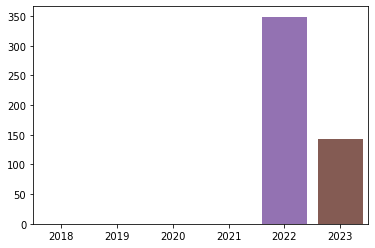

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plot = sns.barplot(data=df)
plt.savefig("stats.png")

# Monthly

In [5]:
client = MongoClient()
db = client.fair_checker
evaluations = db.evaluations

data_m = {}

for y in range(2018,2024):
    for m in ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10","11", "12"]:
        start = datetime.fromisoformat(f'{y}-{m}-01')
        end = start + timedelta(days=30)
        count = evaluations.count_documents({"started_at": {"$gte": start, "$lt": end}})
        data_m[f"{y}-{m}"] = [count]

df_m = pd.DataFrame(data_m)
df_m.to_csv("months.csv")
df_m

,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,...,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12
0,0,0,0,0,0,0,0,0,0,0,...,110,22,0,0,0,0,0,0,0,0


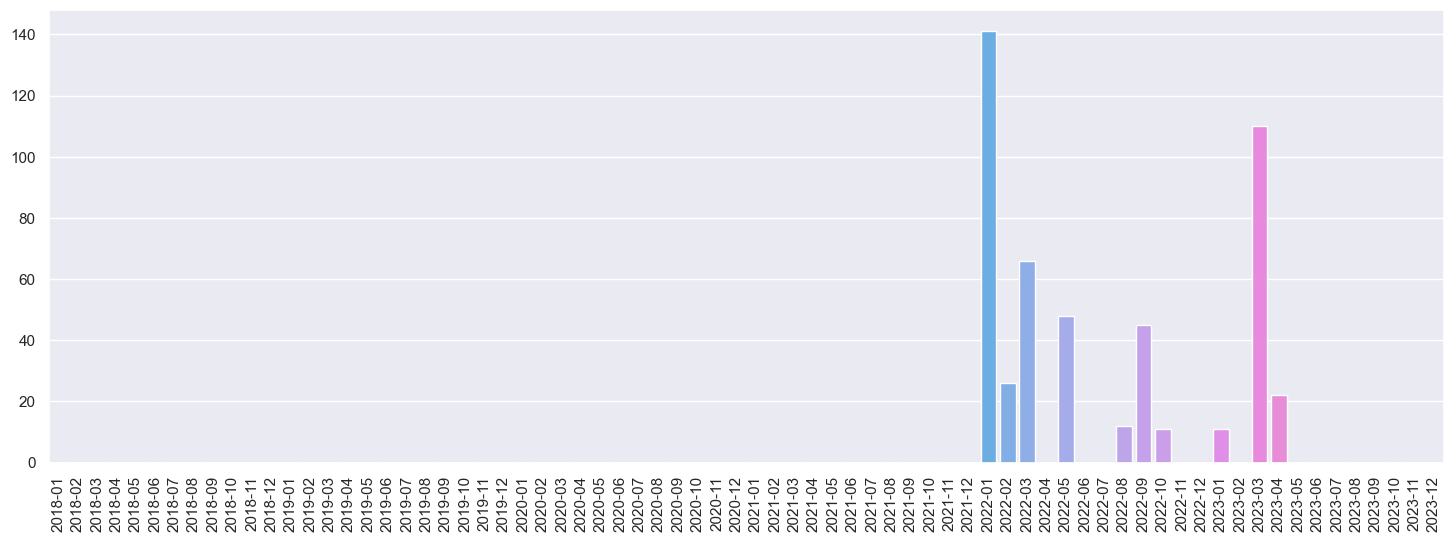

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"]=(18,6)
plt.rcParams["figure.dpi"] = 100
plt.rcParams["savefig.dpi"] = 300

plt.xticks(rotation='vertical')

ax = sns.barplot(data=df_m)

In [19]:
ax.get_figure().savefig('monthly.pdf')
ax.get_figure().savefig('monthly.png')

# Assessed domains 

In [8]:
from urllib.parse import urlparse

client = MongoClient()
db = client.fair_checker
evaluations = db.evaluations

domains = {}

for e in evaluations.find({}):
    url = urlparse(e["target_uri"])
    d = url.netloc
    if not d in domains.keys():
        domains[d] = 1
    domains[d] += 1

json_data = []
print(domains)
for d in domains.keys():
    json_data.append({"domain":d, "FAIReval":domains[d]})
    
df_domains = pd.DataFrame(json_data)

df_sorted = df_domains.sort_values(by="FAIReval", ascending=False)
df_sorted.to_csv("domains.csv")

{'bio.tools': 346, 'doi.pangaea.de': 76, 'workflowhub.eu': 47, 'search.datacite.org': 27}


# Top 20 evaluated domains 

<AxesSubplot:xlabel='domain', ylabel='FAIReval'>

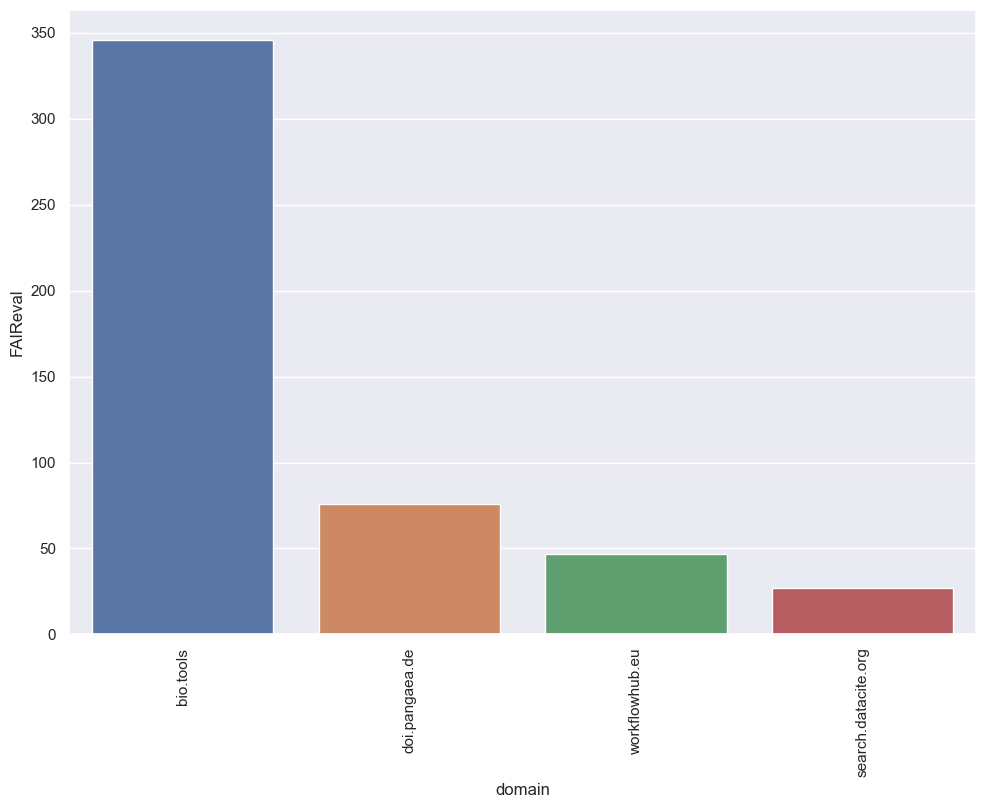

In [23]:
import seaborn as sns 
sns.set(rc={'figure.figsize':(11.7,8.27)})

ax = sns.barplot(x=df_domains["domain"].head(20), y=df_domains["FAIReval"])
ax.tick_params(axis='x', rotation=90)
ax

In [17]:
ax.get_figure().savefig('domains.pdf')
ax.get_figure().savefig('domains.png')